# Homework 2

In this homework, we will use the Laptops price dataset from Kaggle.

https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset

#### Library imports

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#### Load data

In [3]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"
df = pd.read_csv(url)
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


#### Prepare dataset

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
df = df [['ram','storage','screen','final_price']]
df.head(2)

,ram,storage,screen,final_price
0,8,512,15.6,1009.0
1,8,256,15.6,299.0


#### EDA
Look at the final_price variable. Does it have a long tail?


Matplotlib is building the font cache; this may take a moment.


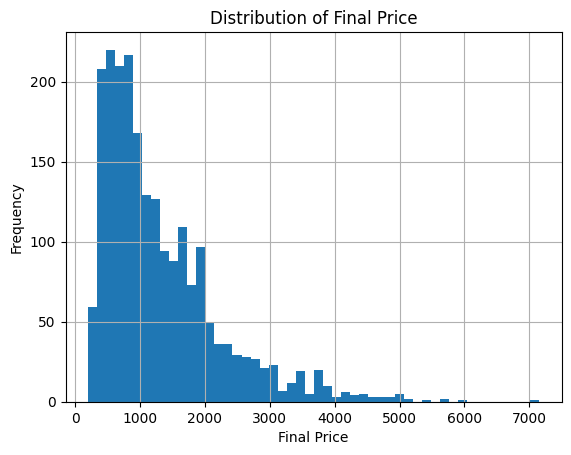

In [7]:

df['final_price'].hist(bins=50)
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.title('Distribution of Final Price')
plt.show()


final_price has a long tail. It is right-skewed.

#### Q1. There's one column with missing values. What is it?



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


#### Q2 What's the median (50% percentile) for variable 'ram'?


In [8]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


#### Prepare and split the dataset


In [49]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [63]:

# Split the data into 60% training, 20% validation, and 20% test sets
df_train, temp_data = train_test_split(df, test_size=0.4, random_state=42)
df_val, df_test = train_test_split(temp_data, test_size=0.5, random_state=42)
len(df_train), len(df_test), len(df_val)

(1296, 432, 432)

In [64]:
y_train = np.log1p(df_train.final_price.values)
y_test = np.log1p(df_test.final_price.values)
y_val = np.log1p(df_val.final_price.values)

In [65]:
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

#### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [30]:
df_train['screen'] = df_train['screen'].fillna(df_train['screen'].mean())

np.float64(15.156965944272445)

In [31]:
df_train_zero = df_train.fillna(0)
df_val_zero = df_val.fillna(0)


In [32]:


model_zero = LinearRegression()
model_zero.fit(df_train_zero, y_train)

LinearRegression()

In [35]:
y_pred_zero = model_zero.predict(df_val_zero)


In [37]:
rmse_zero = np.sqrt(mean_squared_error(y_val, y_pred_zero))
rmse_zero

np.float64(0.44532468481689697)

In [42]:
mean_values = df_train['screen'].mean()
df_train_mean = df_train.fillna(mean_values)
df_val_mean = df_val.fillna(df_val['screen'].mean())

model_mean = LinearRegression()
model_mean.fit(df_train_mean, y_train)

y_pred_mean = model_mean.predict(df_val_mean)

rmse_mean = np.sqrt(mean_squared_error(y_val, y_pred_mean))

# Compare RMSEs and round to 2 decimal places
rmse_zero_rounded = round(rmse_zero, 2)
rmse_mean_rounded = round(rmse_mean, 2)

(rmse_zero_rounded, rmse_mean_rounded)

(np.float64(0.45), np.float64(0.45))

#### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

In [68]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100, 500]

df_train_filled = df_train.fillna(0)
df_val_filled = df_val.fillna(0)

rmse_results = {}

for r in r_values:
    model_ridge = Ridge(alpha=r)
    model_ridge.fit(df_train_filled, y_train)
    y_pred_ridge = model_ridge.predict(df_val_filled)
    rmse_ridge = np.sqrt(mean_squared_error(y_val, y_pred_ridge))
    rmse_ridge_rounded = round(rmse_ridge, 2)
    rmse_results[r] = rmse_ridge_rounded
best_r = min(rmse_results, key=rmse_results.get)
best_rmse = rmse_results[best_r]
rmse_results, best_r, best_rmse


({0: np.float64(0.43),
  0.01: np.float64(0.43),
  0.1: np.float64(0.43),
  1: np.float64(0.43),
  5: np.float64(0.43),
  10: np.float64(0.43),
  100: np.float64(0.43),
  500: np.float64(0.44)},
 0,
 np.float64(0.43))

#### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))


What's the value of std?

In [85]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    df_train, temp_data = train_test_split(df, test_size=0.4, random_state=seed)
    df_val, df_test = train_test_split(temp_data, test_size=0.5, random_state=seed)

    y_train = np.log(df_train.final_price.values)
    y_test = np.log(df_test.final_price.values)
    y_val = df_val.final_price.values

    df_train_zero = df_train.fillna(0)
    df_val_zero = df_val.fillna(0)
    model_zero = LinearRegression()
    model_zero.fit(df_train_zero, y_train)
    y_pred_zero = model_zero.predict(df_val_zero)
    rmse_zero = np.sqrt(mean_squared_error(y_val, y_pred_zero))
    rmse_scores.append(rmse_zero)

std_rmse = np.std(rmse_scores)
std_rmse_rounded = round(std_rmse, 3)
std_rmse_rounded
    

np.float64(54.791)